In [1]:
import tensorflow as tf
import tensorflow_hub as hub
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

In [2]:
INPUT_IMAGE_URL = "eiffel_tower.jpg"
# Bildquelle:
# "https://upload.wikimedia.org/wikipedia/commons/thumb/6/6e/Tour_Eiffel_in_2007_from_Champ-de-Mars.jpg/634px-Tour_Eiffel_in_2007_from_Champ-de-Mars.jpg"

In [3]:
STYLE_IMAGE_URL = "monet.jpg"
# Bildquelle: 
# "https://upload.wikimedia.org/wikipedia/commons/thumb/4/4e/Claude_Monet_-_Meules_%28W_1273%29.jpg/614px-Claude_Monet_-_Meules_%28W_1273%29.jpg"

In [4]:
# Bildquelle: 
def load_image(url,resize=True):
    image = plt.imread(url) 
    img  = image.astype(np.float32)[np.newaxis, ...] / 255.
    if(resize):
        img  = tf.image.resize(img, (256, 256))
    return  img

In [5]:
# Laden des TensorFlow Hub Modells
hub_module = hub.load('https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/2')

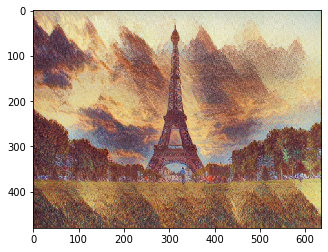

In [6]:
# Stylize image.
outputs = hub_module(tf.constant(load_image(INPUT_IMAGE_URL,False)), 
                     tf.constant(load_image(STYLE_IMAGE_URL)))
stylized_image = outputs[0][0]
plt.imshow(stylized_image)
plt.show()